We are goign to an example of a differential cross section in which combine performs a type of unfolding. We build our datacard so that there are multiple bins and multiple signal processes all contributing to each bin. The amount that a signal process contributes to each bin is the so-called "response matrix". Look at the datacard:

In [9]:
%%bash
grep "process  \|bin  " Datacard_13TeV_differential_pT_moriond17_reminiaod_extrabin_corrections.txt

bin             SigmaMpTTag_0_recoPt_0p0to15p0_13TeV SigmaMpTTag_0_recoPt_15p0to30p0_13TeV SigmaMpTTag_0_recoPt_30p0to45p0_13TeV SigmaMpTTag_0_recoPt_45p0to85p0_13TeV SigmaMpTTag_0_recoPt_85p0to125p0_13TeV SigmaMpTTag_0_recoPt_125p0to200p0_13TeV SigmaMpTTag_0_recoPt_200p0to350p0_13TeV SigmaMpTTag_0_recoPt_350p0to10000p0_13TeV SigmaMpTTag_1_recoPt_0p0to15p0_13TeV SigmaMpTTag_1_recoPt_15p0to30p0_13TeV SigmaMpTTag_1_recoPt_30p0to45p0_13TeV SigmaMpTTag_1_recoPt_45p0to85p0_13TeV SigmaMpTTag_1_recoPt_85p0to125p0_13TeV SigmaMpTTag_1_recoPt_125p0to200p0_13TeV SigmaMpTTag_1_recoPt_200p0to350p0_13TeV SigmaMpTTag_1_recoPt_350p0to10000p0_13TeV SigmaMpTTag_2_recoPt_0p0to15p0_13TeV SigmaMpTTag_2_recoPt_15p0to30p0_13TeV SigmaMpTTag_2_recoPt_30p0to45p0_13TeV SigmaMpTTag_2_recoPt_45p0to85p0_13TeV SigmaMpTTag_2_recoPt_85p0to125p0_13TeV SigmaMpTTag_2_recoPt_125p0to200p0_13TeV SigmaMpTTag_2_recoPt_200p0to350p0_13TeV SigmaMpTTag_2_recoPt_350p0to10000p0_13TeV 
bin             SigmaMpTTag_0_recoPt_0p0to15p0_

There are a lot of stuff there, but there are basically 8 bins and 8 signals. The Signals start with "InsideAcceptance" and have different genPt ranges. These are the cross sections we want to measure. Lets convert it a binary workspace mapping a different POI to each signal process with the multiSignalModel PhysicsModel:

In [6]:
%%bash
text2workspace.py -P HiggsAnalysis.CombinedLimit.PhysicsModel:multiSignalModel  --PO verbose \
      --PO 'map=.*/InsideAcceptance_genPt_0p0to15p0:r_0p0to15p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_15p0to30p0:r_15p0to30p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_30p0to45p0:r_30p0to45p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_45p0to85p0:r_45p0to85p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_85p0to125p0:r_85p0to125p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_125p0to200p0:r_125p0to200p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_200p0to350p0:r_200p0to350p0[1,0,3]' \
      --PO 'map=.*/InsideAcceptance_genPt_350p0to10000p0:r_350p0to10000p0[1,0,3]' \
      --PO 'higgsMassRange=123,127' \
      Datacard_13TeV_differential_pT_moriond17_reminiaod_extrabin_corrections.txt -o Datacard_PtH.root

Will create a POI  r_0p0to15p0  with factory  r_0p0to15p0[1,0,3]
Mapping  r_0p0to15p0  to  ['.*/InsideAcceptance_genPt_0p0to15p0']  patterns
Will create a POI  r_15p0to30p0  with factory  r_15p0to30p0[1,0,3]
Mapping  r_15p0to30p0  to  ['.*/InsideAcceptance_genPt_15p0to30p0']  patterns
Will create a POI  r_30p0to45p0  with factory  r_30p0to45p0[1,0,3]
Mapping  r_30p0to45p0  to  ['.*/InsideAcceptance_genPt_30p0to45p0']  patterns
Will create a POI  r_45p0to85p0  with factory  r_45p0to85p0[1,0,3]
Mapping  r_45p0to85p0  to  ['.*/InsideAcceptance_genPt_45p0to85p0']  patterns
Will create a POI  r_85p0to125p0  with factory  r_85p0to125p0[1,0,3]
Mapping  r_85p0to125p0  to  ['.*/InsideAcceptance_genPt_85p0to125p0']  patterns
Will create a POI  r_125p0to200p0  with factory  r_125p0to200p0[1,0,3]
Mapping  r_125p0to200p0  to  ['.*/InsideAcceptance_genPt_125p0to200p0']  patterns
Will create a POI  r_200p0to350p0  with factory  r_200p0to350p0[1,0,3]
Mapping  r_200p0to350p0  to  ['.*/InsideAcceptance_

Lets get the best fit for this model. We use strategy 0 because the workspace uses RooMultiPdf which causes problems for the full covariance matrix. This will take a few minutes, because we are cycling through all possible background pdfs.

In [10]:
%%bash
combine -M MultiDimFit -n BestFit -m 125 Datacard_PtH.root  --saveWorkspace --saveFitResult --cminDefaultMinimizerStrategy 0

 <<< Combine >>> 
>>> including systematics
>>> method used is MultiDimFit
>>> random number generator seed is 123456
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_0p0to15p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_15p0to30p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_30p0to45p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_45p0to85p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_85p0to125p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_125p0to200p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_200p0to350p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_0_recoPt_350p0to10000p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_0p0to15p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_15p0to30p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_30p0to45p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_45p0to85p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_85p0to125p0_13TeV
Adding discrete pdfindex_SigmaMpTTag_1_recoPt_125p0to20

ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.


Now lets do an explicit likelihood scan of each POI to get the uncertainty. Here we freeze the background PDF indices to their best fit and freeze the inactive background pdf parameters (to help minuit), because it will take much longer if we float them (you could send those jobs to crab, if you really needed to float them). This again will take a few minutes.

In [18]:
%%bash
freezeEnvelope=$(python getCommaSeparatedListOfVariablesToFreeze.py higgsCombineBestFit.MultiDimFit.mH125.root 2>/dev/null),
for poi in "r_0p0to15p0" "r_15p0to30p0" "r_30p0to45p0" "r_45p0to85p0" "r_85p0to125p0" "r_125p0to200p0" "r_200p0to350p0" "r_350p0to10000p0"
do
combine -M MultiDimFit -n Scan${poi} -m 125 -d higgsCombineBestFit.MultiDimFit.mH125.root -w w --snapshotName MultiDimFit --skipInitialFit -P $poi --floatOtherPOIs 1 --algo=grid --points 30 --saveInactivePOI=1 --cminDefaultMinimizerStrategy 0 --freezeParameters $freezeEnvelope
done

 <<< Combine >>> 
>>> including systematics
>>> method used is MultiDimFit
>>> random number generator seed is 123456
Computing results starting from observation (a-posteriori)
MultiDimFit -- Skipping initial global fit
 POI: r_0p0to15p0= 1.28142 -> [0,3]
Point 0/30 r_0p0to15p0 = 0.05
Point 1/30 r_0p0to15p0 = 0.15
Point 2/30 r_0p0to15p0 = 0.25
Point 3/30 r_0p0to15p0 = 0.35
Point 4/30 r_0p0to15p0 = 0.45
Point 5/30 r_0p0to15p0 = 0.55
Point 6/30 r_0p0to15p0 = 0.65
Point 7/30 r_0p0to15p0 = 0.75
Point 8/30 r_0p0to15p0 = 0.85
Point 9/30 r_0p0to15p0 = 0.95
Point 10/30 r_0p0to15p0 = 1.05
Point 11/30 r_0p0to15p0 = 1.15
Point 12/30 r_0p0to15p0 = 1.25
Point 13/30 r_0p0to15p0 = 1.35
Point 14/30 r_0p0to15p0 = 1.45
Point 15/30 r_0p0to15p0 = 1.55
Point 16/30 r_0p0to15p0 = 1.65
Point 17/30 r_0p0to15p0 = 1.75
Point 18/30 r_0p0to15p0 = 1.85
Point 19/30 r_0p0to15p0 = 1.95
Point 20/30 r_0p0to15p0 = 2.05
Point 21/30 r_0p0to15p0 = 2.15
Point 22/30 r_0p0to15p0 = 2.25
Point 23/30 r_0p0to15p0 = 2.35
Point 24/3

ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.
ModelConfig 'ModelConfig' defines more than one parameter of interest. This is not supported in some statistical methods.


Now we want to plot the scans:

In [1]:
%%bash
for poi in "r_0p0to15p0" "r_15p0to30p0" "r_30p0to45p0" "r_45p0to85p0" "r_85p0to125p0" "r_125p0to200p0" "r_200p0to350p0" "r_350p0to10000p0"
do
plot1DScan.py higgsCombineScan${poi}.MultiDimFit.mH125.root --main-label $poi --POI $poi --output scan_${poi}
done

--------------------------------------
scan_r_0p0to15p0
--------------------------------------
[{'lo': 0.8684928973991034, 'hi': 1.7123326678932156, 'valid_hi': True, 'valid_lo': True}]
[{'lo': 0.46756254461431035, 'hi': 2.1675888977758255, 'valid_hi': True, 'valid_lo': True}]
--------------------------------------
scan_r_15p0to30p0
--------------------------------------
[{'lo': 1.388343091665161, 'hi': 2.0839673435678727, 'valid_hi': True, 'valid_lo': True}]
[{'lo': 1.0662208417797272, 'hi': 2.465395706368721, 'valid_hi': True, 'valid_lo': True}]
--------------------------------------
scan_r_30p0to45p0
--------------------------------------
[{'lo': 0.5160802659038749, 'hi': 1.3001653265824027, 'valid_hi': True, 'valid_lo': True}]
[{'lo': 0.1431963367720592, 'hi': 1.7230826064839635, 'valid_hi': True, 'valid_lo': True}]
--------------------------------------
scan_r_45p0to85p0
--------------------------------------
[{'lo': 0.7546814807967173, 'hi': 1.4221117066465363, 'valid_hi': True, 

Info in <TCanvas::Print>: pdf file ./scan_r_0p0to15p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_0p0to15p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_15p0to30p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_15p0to30p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_30p0to45p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_30p0to45p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_45p0to85p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_45p0to85p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_85p0to125p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_85p0to125p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_125p0to200p0.pdf has been created
Info in <TCanvas::Print>: png file ./scan_r_125p0to200p0.png has been created
Info in <TCanvas::Print>: pdf file ./scan_r_200p0to350p0.pdf has been created
Info i

Here is one of them, as an example:

In [14]:
from IPython.display import IFrame
IFrame("./scan_r_0p0to15p0.pdf", width=800, height=800)

Now we want to estimate the covariance between the POIs. We can do that in a couple of ways. First we can freeze the discrete nuisances at their best fit and use robustHesse option with strategy 1. This will drop some elements of the Hessian matrix which are spurious in order to compute a covariance matrix. The POIs are protected so they will not be dropped.

In [ ]:
%%bash
freezeEnvelope=$(python getCommaSeparatedListOfVariablesToFreeze.py higgsCombineBestFit.MultiDimFit.mH125.root 2>/dev/null),
combine -M MultiDimFit -n BestFitFreezeDiscrete -m 125 -d  higgsCombineBestFit.MultiDimFit.mH125.root -w w --snapshotName MultiDimFit --freezeParameters $freezeEnvelope --cminFallbackAlgo Minuit2,Migrad,1:1.0 --robustHesse 1

We can then plot the correlation matrix just for the signal POIs using this macro.

r_0p0to15p0 r_0p0to15p0 1.0
r_0p0to15p0 r_15p0to30p0 0.0359417647123
r_0p0to15p0 r_30p0to45p0 0.0677059143782
r_0p0to15p0 r_45p0to85p0 0.032249160111
r_0p0to15p0 r_85p0to125p0 0.043304592371
r_0p0to15p0 r_125p0to200p0 0.0388070456684
r_0p0to15p0 r_200p0to350p0 0.058225940913
r_0p0to15p0 r_350p0to10000p0 0.0301321726292
r_15p0to30p0 r_0p0to15p0 0.0359417647123
r_15p0to30p0 r_15p0to30p0 1.0
r_15p0to30p0 r_30p0to45p0 0.0341228954494
r_15p0to30p0 r_45p0to85p0 0.0647140443325
r_15p0to30p0 r_85p0to125p0 0.0602935813367
r_15p0to30p0 r_125p0to200p0 0.0665997862816
r_15p0to30p0 r_200p0to350p0 0.10624884069
r_15p0to30p0 r_350p0to10000p0 0.0388170704246
r_30p0to45p0 r_0p0to15p0 0.0677059143782
r_30p0to45p0 r_15p0to30p0 0.0341228954494
r_30p0to45p0 r_30p0to45p0 1.0
r_30p0to45p0 r_45p0to85p0 -0.0138949621469
r_30p0to45p0 r_85p0to125p0 0.0425212718546
r_30p0to45p0 r_125p0to200p0 0.0337883345783
r_30p0to45p0 r_200p0to350p0 0.0484173633158
r_30p0to45p0 r_350p0to10000p0 0.0346525683999
r_45p0to85p0 r_0

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


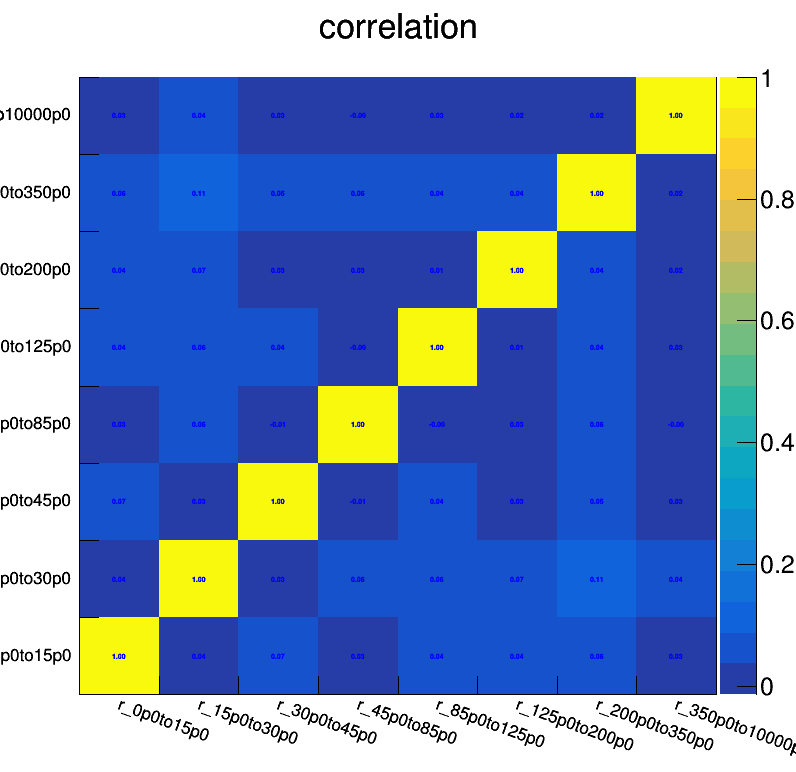

In [16]:
import ROOT as r

r.gStyle.SetOptStat(0)
r.gStyle.SetPaintTextFormat("0.2f")

f = r.TFile("robustHesseBestFitFreezeDiscrete.root","READ")
h = f.Get("h_correlation")

corr = r.TH2F("corr","correlation",8,0,8,8,0,8)

nx = 0

for x in range(h.GetNbinsX()):

  ny = 0

  xlabel = h.GetXaxis().GetBinLabel(x)
  if (not xlabel.startswith("r_")): continue
  nx+=1

  for y in range(h.GetNbinsY()):

    ylabel = h.GetXaxis().GetBinLabel(y)
    if (not ylabel.startswith("r_")): continue
    ny+=1

    corr.GetXaxis().SetBinLabel(nx,xlabel)
    corr.GetYaxis().SetBinLabel(ny,ylabel)
    corr.SetBinContent(nx,ny,h.GetBinContent(x,y))

    print h.GetXaxis().GetBinLabel(x),h.GetXaxis().GetBinLabel(y),h.GetBinContent(x,y)

c1 = r.TCanvas("c1","c1",800,800)
c1.cd()
corr.Draw("colztext")

c1.Draw()

We can also use the likelihood scans we did before. Since we added  --saveInactivePOI=1, we have essentially the correlation between each POI near the minimum of the likelihood, which is what we want. We can use the following macro to plot the correlation:

r_0p0to15p0 r_0p0to15p0 1.0
r_0p0to15p0 r_15p0to30p0 0.0339362427152
r_0p0to15p0 r_30p0to45p0 0.0679135514517
r_0p0to15p0 r_45p0to85p0 0.033720296063
r_0p0to15p0 r_85p0to125p0 0.0428058538489
r_0p0to15p0 r_125p0to200p0 0.0418791290731
r_0p0to15p0 r_200p0to350p0 0.0598059896994
r_0p0to15p0 r_350p0to10000p0 0.0312530038329
r_15p0to30p0 r_0p0to15p0 0.0339362427152
r_15p0to30p0 r_15p0to30p0 1.0
r_15p0to30p0 r_30p0to45p0 0.0340577046303
r_15p0to30p0 r_45p0to85p0 0.0669453444414
r_15p0to30p0 r_85p0to125p0 0.0613543556969
r_15p0to30p0 r_125p0to200p0 0.0703346494996
r_15p0to30p0 r_200p0to350p0 0.110352161644
r_15p0to30p0 r_350p0to10000p0 0.0393116304829
r_30p0to45p0 r_0p0to15p0 0.0679135514517
r_30p0to45p0 r_15p0to30p0 0.0340577046303
r_30p0to45p0 r_30p0to45p0 1.0
r_30p0to45p0 r_45p0to85p0 -0.0136483181027
r_30p0to45p0 r_85p0to125p0 0.0422649381411
r_30p0to45p0 r_125p0to200p0 0.035821115475
r_30p0to45p0 r_200p0to350p0 0.0490276540198
r_30p0to45p0 r_350p0to10000p0 0.0341848652061
r_45p0to85p0 r

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


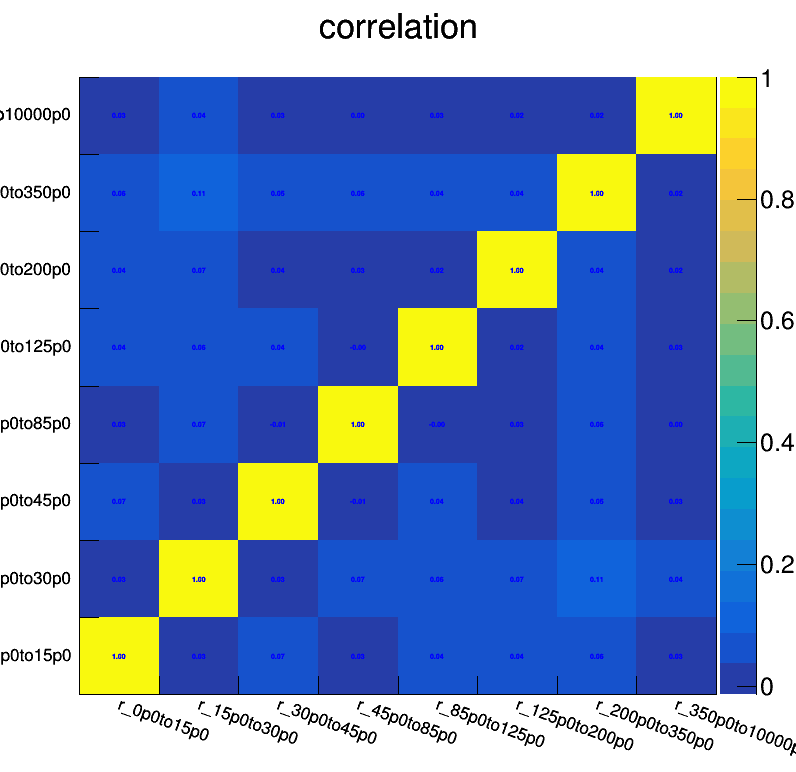

In [22]:
import ROOT as r

r.gStyle.SetOptStat(0)
r.gStyle.SetPaintTextFormat("0.2f")

corr = r.TH2F("corr","correlation",8,0,8,8,0,8)

corr.SetDirectory(0)

nx = 0

for poi1 in ["r_0p0to15p0","r_15p0to30p0","r_30p0to45p0","r_45p0to85p0","r_85p0to125p0","r_125p0to200p0","r_200p0to350p0","r_350p0to10000p0"]:

  f1 = r.TFile("higgsCombineScan"+poi1+".MultiDimFit.mH125.root","READ")
  t1 = f1.Get("limit")

  nx+=1
  ny=0

  for poi2 in ["r_0p0to15p0","r_15p0to30p0","r_30p0to45p0","r_45p0to85p0","r_85p0to125p0","r_125p0to200p0","r_200p0to350p0","r_350p0to10000p0"]:


    f2 = r.TFile("higgsCombineScan"+poi2+".MultiDimFit.mH125.root","READ")
    t2 = f2.Get("limit")

    t1.Draw(poi2+":"+poi1,"2.0*deltaNLL<1.0")
    gr = r.gPad.GetPrimitive("Graph");
    pol1 = r.TF1("pol1","pol1",0.0,3.0)
    gr.Fit("pol1")
    corr1 = pol1.GetParameter(1)

    t2.Draw(poi1+":"+poi2,"2.0*deltaNLL<1.0")
    gr = r.gPad.GetPrimitive("Graph");
    pol1 = r.TF1("pol1","pol1",0.0,3.0)
    gr.Fit("pol1")
    corr2 = pol1.GetParameter(1)

    # take an average, since both should be correct (although they do differ slightly)
    corr_ave = 0.5*(corr1+corr2)

    ny+=1

    corr.GetXaxis().SetBinLabel(nx,poi1)
    corr.GetYaxis().SetBinLabel(ny,poi2)
    corr.SetBinContent(nx,ny,corr_ave)

    print poi1,poi2,corr_ave

c1 = r.TCanvas("c1","c1",800,800)
c1.cd()
corr.Draw("colztext")

c1.Draw()

You can see that the two methods give very similar results! Now you have everything you need to for a theorist to reinterpret your cross section measurement in whatever way they want!